In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Loading Data

In [2]:
raw_data = pd.read_csv('DataSalary.csv')
raw_data.head()

,Index,YearsExperience,Salary
0,1,1.1,39343.0
1,2,1.3,46205.0
2,3,1.5,37731.0
3,4,2.0,43525.0
4,5,2.2,39891.0


In [3]:
raw_data.describe(include='all')

,Index,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,15.500000,5.313333,76003.000000
std,8.803408,2.837888,27414.429785
min,1.000000,1.100000,37731.000000
25%,8.250000,3.200000,56720.750000
50%,15.500000,4.700000,65237.000000
75%,22.750000,7.700000,100544.750000
max,30.000000,10.500000,122391.000000


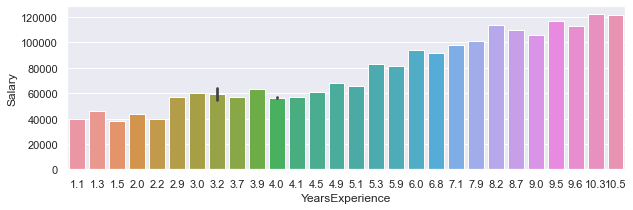

In [4]:
fig,ax = plt.subplots(figsize=(10,3))
sns.barplot(raw_data['YearsExperience'],raw_data['Salary'])

Here, we get to know that with **Year of Experience** increase the **salary of the employees** also increases

## Defining the Independent and Dependent data

In [5]:
x1 = raw_data['YearsExperience']  #Independent Variables
y = raw_data['Salary'] #Dependent Variables

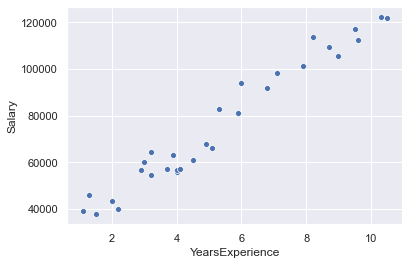

In [6]:
sns.scatterplot(x1,y)

#### It can be seen that both data is highly correleated to each other

## Regression Itself

In [7]:
import statsmodels.api as sm
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           1.14e-20
Time:                        19:51:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drawing the Regression Line

Text(0, 0.5, 'Salary')

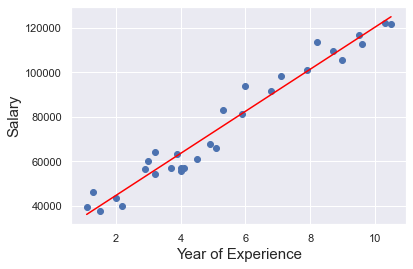

In [8]:
yhat = 25790+x1*9449.9623
plt.scatter(x1,y)
fig = plt.plot(x1,yhat,c='red',label='linear regression')
plt.xlabel('Year of Experience',fontsize=15)
plt.ylabel('Salary',fontsize=15)

In [15]:
new_data = pd.DataFrame({'const':1,
                        'Year of Experience':[1.2,5.6,12.3,7.2]})
#new_data
new_data['predictions'] = results.predict(new_data).astype('int32')

In [16]:
new_data.drop('const',axis=1)

,Year of Experience,predictions
0,1.2,37132
1,5.6,78711
2,12.3,142026
3,7.2,93831
